# Gestión Moderna de Portafolio
### Autores Bernardo León y Carlos Zapata
### (C) Copyright 2023

## Capitulo 3: Modelo CAPM

### Ejemplos 3.1 y 3.2. Estimación de parámetros: $\alpha_i$ y $\beta_i$

In [12]:
#Librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [9]:
## Estimaciones para AAPL
# Información histórica para AAPL 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
aapl = ["AAPL"]
p_aapl = yf.download(aapl,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna();
r_aapl = np.log(p_aapl/p_aapl.shift(1)).dropna()
aapl = ["AAPL"]
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna();
r_indice = np.log(indice/indice.shift(1)).dropna()
rm = r_indice.mean()
sigmam = r_indice.std()
print("Retorno: ",round(rm,4))
print("Volatilidad: ", round(sigmam,4))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Retorno:  0.0101
Volatilidad:  0.0441


In [13]:
# Estimación lineal
slope, intercept, r, p, std_err = stats.linregress(r_indice, r_aapl)
def linestim(x):
  return intercept + slope * x

model = list(map(linestim, r_indice))

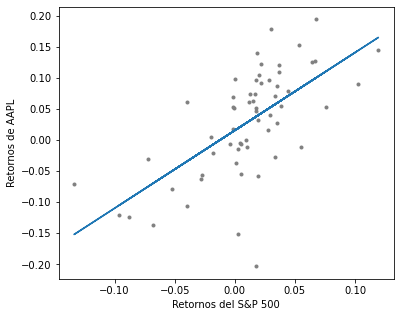

In [14]:
# Gráfico de dispersión
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(r_indice, r_aapl, ".", color = 'gray')
plt.plot(r_indice, model)
plt.xlabel("Retornos del S&P 500")
plt.ylabel("Retornos de AAPL")
plt.show();

In [ ]:
# Estimacion betas
beta = round(slope,4)
alpha = round(intercept,4)
print('Beta AAPL: ', beta )
print('Alpha AAPL: ', alpha)

Beta AAPL:  1.2533
Alpha AAPL:  0.0155


In [ ]:
## Estimaciones para AAPL, AMZN, GOOG y MSFT
# Información histórica 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN","GOOG","MSFT"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Estimaciones AAPL
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['AAPL'])
def linestim(x):
  return intercept + slope * x

beta_aapl = slope
alpha_aapl = intercept
print("Beta: ", round(beta_aapl,4))
print("Alpha: ", round(alpha_aapl,4))
print(f"R-squared: {r**2:.6f}")

Beta:  1.2533
Alpha:  0.0155
R-squared: 0.415940


In [ ]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error_aapl = (((retornos['AAPL']-model)**2).sum())/(t-1)
round(error_aapl,4)

0.0043

In [ ]:
# Estimaciones AMZN
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['AMZN'])
def linestim(x):
  return intercept + slope * x

beta_amzn = slope
alpha_amzn = intercept
print("Beta: ", round(beta_amzn,4))
print("Alpha: ", round(alpha_amzn,4))
print(f"R-squared: {r**2:.6f}")

Beta:  1.162
Alpha:  0.0144
R-squared: 0.403685


In [ ]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error_amzn = (((retornos['AMZN']-model)**2).sum())/(t-1)
round(error_amzn,4)

0.0039

In [ ]:
# Estimaciones GOOG
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['GOOG'])
def linestim(x):
  return intercept + slope * x

beta_goog = slope
alpha_goog = intercept

print("Beta: ", round(beta_goog,4))
print("Alpha: ", round(alpha_goog,4))
print(f"R-squared: {r**2:.6f}")

Beta:  0.9834
Alpha:  0.004
R-squared: 0.507986


In [ ]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error_goog = (((retornos['GOOG']-model)**2).sum())/(t-1)
round(error_goog,4)

0.0018

In [ ]:
# Estimaciones MSFT
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['MSFT'])
def linestim(x):
  return intercept + slope * x

beta_msft = slope
alpha_msft = intercept
print("Beta: ", round(beta_msft,4))
print("Alpha: ", round(alpha_msft,4))
print(f"R-squared: {r**2:.6f}")

Beta:  0.8035
Alpha:  0.0165
R-squared: 0.469904


In [ ]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error_msft = (((retornos['MSFT']-model)**2).sum())/(t-1)
round(error_msft,4)

0.0014

In [ ]:
# Estimación de retornos esperados 
rf = 0.02/12
re_aapl = rf + beta_aapl*(rm-rf)
re_amzn = rf + beta_amzn*(rm-rf)
re_goog = rf + beta_goog*(rm-rf)
re_msft = rf + beta_msft*(rm-rf)

print("E(R)_aapl: ", round(re_aapl,4))
print("E(R)_amzn: ", round(re_amzn,4))
print("E(R)_goog: ", round(re_goog,4))
print("E(R)_msft: ", round(re_msft,4))

E(R)_aapl:  0.0123
E(R)_amzn:  0.0115
E(R)_goog:  0.01
E(R)_msft:  0.0085


## Ejemplo 3.3
## Modelo de Sharpe para portafolio óptimo

In [ ]:
round(rm,4), round(sigmam,4)

(0.0101, 0.0441)

In [ ]:
mu = np.array(retornos.mean())
n = len(mu)
unos = np.repeat(1,n)
sigma_error = np.array([error_aapl, error_amzn, error_goog, error_msft, sigmam**2])
betas = np.array([beta_aapl, beta_amzn, beta_goog, beta_msft, -1])
alphas = np.array([alpha_aapl, alpha_amzn, alpha_goog, alpha_msft, rm])
uno = np.array([1,1,1,1,0])
sigmaei = np.diagflat(sigma_error)
alb = np.concatenate(([alphas],[uno],[betas])).T
G = alb.T @ np.linalg.inv(sigmaei) @ alb

In [ ]:
# Vector resultados
res = np.array([0.02, 1, 0])

# Calculo pesos optimos
wpo =  np.linalg.inv(sigmaei) @ alb @ np.linalg.inv(G) @ res
wpo[0:4]

array([-0.02091087,  0.03251799,  0.43296791,  0.55542497])

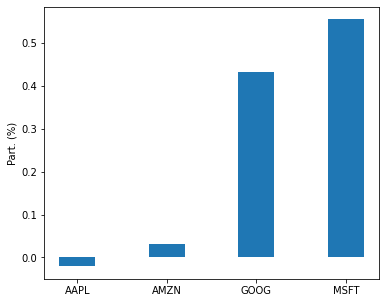

In [ ]:
# Pesos del PMVG
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpo[0:4], width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

In [ ]:
# Construcción de la FE
cov = retornos.cov()
sigma = retornos.std()
rpmin = mu.min()
rpmax = mu.max()
nport = 100

j = np.linspace(rpmin,rpmax, nport) 
wpo = np.zeros((nport, n+1))
rpo = np.zeros((nport,1))
sigmapo = np.zeros((nport,1))

for i in range(nport):
  res = np.array([j[i], 1, 0])
  wj =  np.linalg.inv(sigmaei) @ alb @ np.linalg.inv(G) @ res
  wpo[i,:] = wj
  rpo[i] = wj[0:n] @ mu
  sigmapo[i] = np.sqrt( wj[0:n].T @ cov @ wj[0:n])

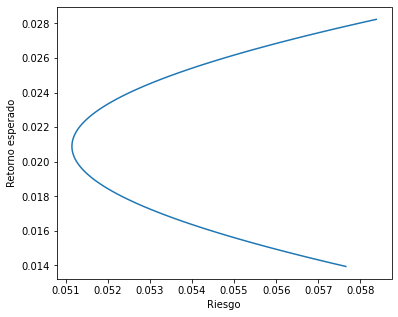

In [ ]:
# Plano Riesgo-Retorno
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(sigmapo, rpo)
plt.xlabel("Riesgo")
plt.ylabel("Retorno esperado")
plt.show()

## Ejemplos 3.4 y 3.5
## Clasificación y optimización ussando el modelo de Treynor

In [15]:
## Información histórica 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","ABT","AMZN","CAT","CSX","META","GOOG","HD","JNJ","MSFT","MCD","V"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna();
retornos = np.log(precios/precios.shift(1)).dropna()
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna();
r_indice = np.log(indice/indice.shift(1)).dropna()
rm = r_indice.mean()*12
sigmam = (r_indice.std())*np.sqrt(12)
round(rm,4), round(sigmam,4)

In [ ]:
# Retornos esperados y volatilidades de los activos
mu = retornos.mean()*12
cov = retornos.cov()*12
var = np.diag(cov)
sigma = (retornos.std())*np.sqrt(12)
estimaciones = pd.concat([mu, sigma],axis=1).T
estimaciones.index=["Retorno","Riesgo"]
estimaciones 

,AAPL,ABT,AMZN,CAT,CSX,GOOG,HD,JNJ,MCD,META,MSFT,V
Retorno,0.338850,0.197844,0.314502,0.227028,0.266688,0.167320,0.162546,0.112313,0.145223,0.191868,0.296015,0.214144
Riesgo,0.297155,0.200081,0.279652,0.256861,0.266807,0.210995,0.207042,0.167893,0.169892,0.269973,0.179247,0.185021


In [ ]:
# Estimaciones: betas y varerror
n = len(mu)
t = 60
def linestim(x):
  return intercept + slope * x

betas = np.zeros((n,1))
varerror = np.zeros((n,1))

for i in range(n):
  slope, intercept, r, p, se = stats.linregress(r_indice, retornos.iloc[:,i])
  model = list(map(linestim, r_indice))
  betas[i] = slope
  varerror[i] = ((((retornos.iloc[:,i]-model)**2).sum())/(t-1))*12


In [ ]:
# Resultados estimaciones: betas y var error
betas.T, varerror.T

(array([[1.25328266, 0.80660809, 1.16195437, 0.98736837, 1.18668263,
         0.98344121, 1.02720572, 0.67969767, 0.58816261, 1.13400304,
         0.80354007, 0.9455014 ]]),
 array([[0.05157325, 0.02481903, 0.0466349 , 0.04318143, 0.03825754,
         0.02190394, 0.01819373, 0.01738544, 0.02077435, 0.04281597,
         0.01703171, 0.01332904]]))

In [ ]:
# Cálculo coeficiente de Treynor
rf = 0
mu = np.array(mu).reshape((n,1))
betas = np.array(betas).reshape((n,1))
treynor = (mu-rf)/betas
treynor.T

array([[0.27036973, 0.24527897, 0.27066639, 0.22993288, 0.22473379,
        0.1701375 , 0.15824046, 0.16523896, 0.24690898, 0.16919543,
        0.36838916, 0.22648704]])

In [ ]:
estimaciones = np.matrix(np.concatenate([np.array(treynor).reshape((n,1)),np.array(mu).reshape((n,1)), 
                                      np.array(sigma).reshape((n,1)), np.array(betas).reshape((n,1)),
                                      np.array(varerror).reshape((n,1))],1))

tabla = pd.DataFrame(estimaciones)
tabla.columns=['Treynor','Retorno','Riesgo','Beta','VarError']
tabla.index=activos 
tabla

,Treynor,Retorno,Riesgo,Beta,VarError
AAPL,0.270370,0.338850,0.297155,1.253283,0.051573
ABT,0.245279,0.197844,0.200081,0.806608,0.024819
AMZN,0.270666,0.314502,0.279652,1.161954,0.046635
CAT,0.229933,0.227028,0.256861,0.987368,0.043181
CSX,0.224734,0.266688,0.266807,1.186683,0.038258
META,0.170137,0.167320,0.210995,0.983441,0.021904
GOOG,0.158240,0.162546,0.207042,1.027206,0.018194
HD,0.165239,0.112313,0.167893,0.679698,0.017385
JNJ,0.246909,0.145223,0.169892,0.588163,0.020774
MSFT,0.169195,0.191868,0.269973,1.134003,0.042816


In [ ]:
# Se ordenan los activos usando el coef. de Treynor
tabla_sort = tabla.sort_values(by=['Treynor'],ascending=False)
tabla_sort

,Treynor,Retorno,Riesgo,Beta,VarError
MCD,0.368389,0.296015,0.179247,0.803540,0.017032
AMZN,0.270666,0.314502,0.279652,1.161954,0.046635
AAPL,0.270370,0.338850,0.297155,1.253283,0.051573
JNJ,0.246909,0.145223,0.169892,0.588163,0.020774
ABT,0.245279,0.197844,0.200081,0.806608,0.024819
CAT,0.229933,0.227028,0.256861,0.987368,0.043181
V,0.226487,0.214144,0.185021,0.945501,0.013329
CSX,0.224734,0.266688,0.266807,1.186683,0.038258
META,0.170137,0.167320,0.210995,0.983441,0.021904
MSFT,0.169195,0.191868,0.269973,1.134003,0.042816


In [ ]:
# Se calcula la tasa de corte y se estiman los pesos óptimos
ratio1 = ((tabla_sort['Retorno']-rf)*tabla_sort['Beta'])/tabla_sort['VarError']
ratio2 = tabla_sort['Beta']**2/tabla_sort['VarError']

sumacu1 = ratio1.cumsum()
sumacu2 = ratio2.cumsum()
tasac = (sigmam**2 * sumacu1)/(1+ sigmam**2 * sumacu2)
cuttoff = tasac.max()

In [ ]:
Zi = (tabla_sort['Beta']/tabla_sort['VarError'])*(tabla_sort['Treynor']-cuttoff)
Zi = Zi.mask(Zi<0, 0)
wi = round(Zi/sum(Zi),4)
wpot = round(wi,4)
wpot

MCD     0.6292
AMZN    0.1078
AAPL    0.1044
JNJ     0.0604
ABT     0.0645
CAT     0.0130
V       0.0179
CSX     0.0028
META    0.0000
MSFT    0.0000
HD      0.0000
GOOG    0.0000
dtype: float64

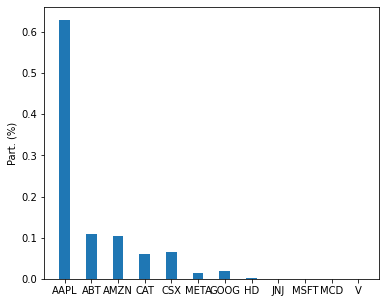

In [ ]:
# Pesos del Portafolio de Treynor
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpot, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()